In [1]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import pickle
import sounddevice
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
import keras
from keras.models import Sequential, Model, model_from_json
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [12]:
fs= 44100
second =  int(input("Enter time duration in seconds: "))
print("Recording")
record_voice = sounddevice.rec( int ( second * fs ) , samplerate = fs , channels = 2 )
sounddevice.wait()
write("File01.wav",fs,record_voice)
print("Saved File")

Enter time duration in seconds:  5


Recording
Saved File


In [13]:
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = keras.optimizers.Adam(lr=0.0001)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Loaded model from disk


In [14]:
newData,newSR= librosa.load("File01.wav")

In [15]:
ipd.Audio("File01.wav")

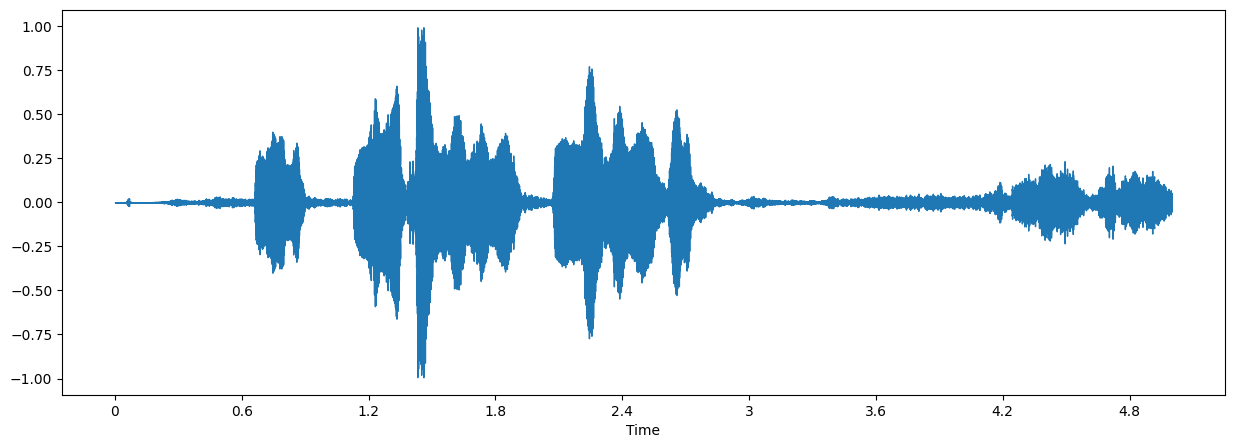

In [16]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(newData, sr=newSR)

In [17]:
newData, newSR = librosa.load("File01.wav"
                              ,duration=2.5
                              ,sr=44100
                              ,offset=0.5)

newSR = np.array(newSR)
mfccs = np.mean(librosa.feature.mfcc(y=newData, sr=newSR, n_mfcc=13),axis=0)
newdf = pd.DataFrame(data=mfccs).T
newdf

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,-26.240814,-24.288818,-22.698843,-21.514635,-23.430696,-25.21423,-27.08779,-24.46464,-21.581806,-20.461815,...,-27.784506,-26.119589,-25.093794,-26.346743,-28.72031,-29.829374,-29.279427,-30.856655,-33.21946,-33.906094


In [18]:
newdf= np.expand_dims(newdf,axis=2)
print(newdf.shape)
newpred=loaded_model.predict(newdf)

(1, 216, 1)
1/1 [==============================] - 0s 195ms/step


In [19]:
filename = filename = 'labels'
infile = open(filename,'rb')
lb = pickle.load(infile)
infile.close()

# Get the final predicted label
final = newpred.argmax(axis=1)
final = final.astype(int).flatten()
final = (lb.inverse_transform((final)))

In [20]:
print(final)

['female_surprise']


In [11]:
if final == "female_surprise":
    final = "surprise"
elif final == "female_happy":
    final = "happy"
elif final == "female_neutral":
    final = "neutral"
elif final == "female_sad":
    final = "sad"
elif final == "female_angry":
    final = "angry"
elif final == "female_fear":
    final = "fear"
elif final == "female_disgust":
    final = "disgust"
elif final == "male_surprise":
    final = "surprise"
elif final == "male_happy":
    final = "happy"
elif final == "male_neutral":
    final = "neutral"
elif final == "male_sad":
    final = "sad"
elif final == "male_angry":
    final = "angry"
elif final == "male_fear":
    final = "fear"
elif final == "male_disgust":
    final = "disgust"
print(final)

disgust
